<a href="https://colab.research.google.com/github/ChristianTrummer99/orbital-mechanics/blob/master/HW4_ORBITAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy.matlib 
import numpy as np
import math as m
import matplotlib.pyplot as plt


In [0]:
#problem 1

se = 10 
h = 8e4
mu = 398600
R_earth = 6378

p = h**2/mu

a = -mu/(2*se)

e = m.sqrt(1 - p/a)


# a 
nu_max = m.acos(-1/e)
print('a) maximum true anomaly = ', m.degrees(nu_max), 'degrees')

# b 
t = -40*60
Mh = mu**2/h**3*(e**2 - 1)**(3/2)*t

def F(e, Mh):
   if Mh > np.pi:
       F = Mh - e / 2
   else:
       F = Mh + e / 2
   precision = 1e-10
   ratio = 1
   while abs(ratio) > precision:
       ratio = (-F + e * np.sinh(F) - Mh) / (e * np.cosh(F) - 1)
       F = F - ratio
   return F
  

nu = 2*m.atan(m.sqrt((e+1)/(e-1))*m.tanh(F(e,Mh)/2))
print('b) nu 40 minutes before perigee = ', m.degrees(nu), "degrees")

# c
r = a*(1 - e**2)/(1 + e*m.cos(nu))
v = m.sqrt(mu*(2/r - 1/a))

print('c) velocity 40 min before perigee = ', v, 'km/s' )

# d
v_inf = m.sqrt(-mu/a)
print('d) excess velocity = ', v_inf, 'km/s')



a) maximum true anomaly =  138.08984431413194 degrees
b) nu 40 minutes before perigee =  -98.78189491471082 degrees
c) velocity 40 min before perigee =  7.71133153379521 km/s
d) excess velocity =  4.47213595499958 km/s


In [0]:
#problem 2 
#find a, e, i, Omega, little omega, and nu

mu = 398600
r = np.array([-2465, 6040, 3413])
v = np.array([1.727, 3.893, -5.883])

def classical_elements(r,v):

  h = np.cross(r,v)
  h_mag = np.linalg.norm(h)
  
  i = m.acos(h[2]/h_mag)
  print('i = ',i, 'radians')
  
  K = np.array([0,0,1])
  N = np.cross(K,h)
  N_mag = np.linalg.norm(N)
  
  
  Omega = m.atan(np.dot(N,np.array([0,1,0]))/np.dot(N,np.array([1,0,0])))+ 2*m.pi
  print('Omega =', Omega,'radians')
  
  e = np.cross(v,h)/mu - r/np.linalg.norm(r)
  e_mag = np.linalg.norm(e)
  
  print("e vector = ",e)
  print('e magnitude =', e_mag)
  
  omega = m.atan(np.dot(h,np.cross(N,e))/(h_mag*np.dot(e,N))) + 2*m.pi
  print('omega =', omega, 'radians')
  
  nu = m.atan2(np.dot(h,np.cross(e,r)),(h_mag*np.dot(e,r))) + 2*m.pi
  print('nu = ', nu, 'radians')
  
  
  a = h_mag**2/mu/(1 - e_mag**2)
  print('a = ',a,'km')
 
classical_elements(r,v)
  

i =  1.954742681770869 radians
Omega = 4.8869027958161135 radians
e vector =  [ 0.01216711 -0.01305798 -0.02404741]
e magnitude = 0.02994707151537141
omega = 5.23593663002149 radians
nu =  3.6652816527448646 radians
a =  7178.000679282885 km


In [0]:
#problem 3 
i =  1.954742681770869 
Omega = 4.8869027958161135
e =  np.array([ 0.01216711, -0.01305798, -0.02404741])
e_mag = 0.02994707151537141
omega = 5.2359366300214
nu =  3.6652816527448646 
a =  7178.000679282885 

def rv(a,e_mag,i,Omega, omega, nu):
  r_mag = (a*(1 - e_mag**2))/(1 + e_mag*m.cos(nu))
  h_mag = m.sqrt(mu*a*(1 - e_mag**2))
  N = np.array([m.cos(Omega),m.sin(Omega),0])
  h = np.array([m.sin(i)*m.sin(Omega),-m.sin(i)*m.cos(Omega),m.cos(i)])
  Nt  = np.array([-m.sin(Omega)*m.cos(i), m.cos(Omega)*m.cos(i), m.sin(i)])
  ur = m.cos(nu + omega)*N + m.sin(nu + omega)*Nt
  up = -m.sin(nu + omega)*N + m.cos(nu + omega)*Nt
  r = r_mag*ur
  v = mu/h_mag*((1 + e_mag*m.cos(nu))*up + e_mag*m.sin(nu)*ur)
  print('position = ',r,'km')
  print('velocity = ',v,'km/s')
 
  
  
rv(a,e_mag,i,Omega,omega,nu)

position =  [-2465.  6040.  3413.] km
velocity =  [ 1.727  3.893 -5.883] km/s


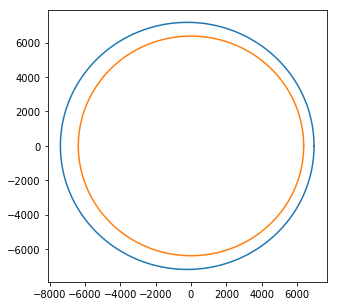

In [0]:
#problem 4
nu = np.arange(0,2*m.pi,0.01)
h_mag = m.sqrt(mu*a*(1 - e_mag**2))

r = np.zeros(len(nu))
nusat = np.zeros(len(nu))

for i in range(0,len(nu)):
  r[i] = (h_mag**2/mu)*(1/(1 + e_mag*m.cos(nu[i])))

  
R = 6378  
x = r*np.cos(nu)
y = r*np.sin(nu)
x1 = R*np.cos(nu)
y1 = R*np.sin(nu)
plt.plot(x,y)
plt.plot(x1,y1)
plt.gcf().set_size_inches(5,5)

plt.show()




In [0]:
#Problem 5 

e = 0.1
P = 2* 3600
mu = 398600
a = (((P/(2*m.pi))**2)*mu)**(1/3)

h = (mu*a*(1 - e**2))**0.5

p = a * (1 - e ** 2)
omega_j2 = 1.99096871e-7
j_2 = .00108263
i = m.degrees(m.acos(omega_j2 * P / (-3 * np.pi * j_2 * R ** 2 / p ** 2)))
print('i = ', i, 'degrees')

i =  102.69969776043831 degrees
